615151/615151 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


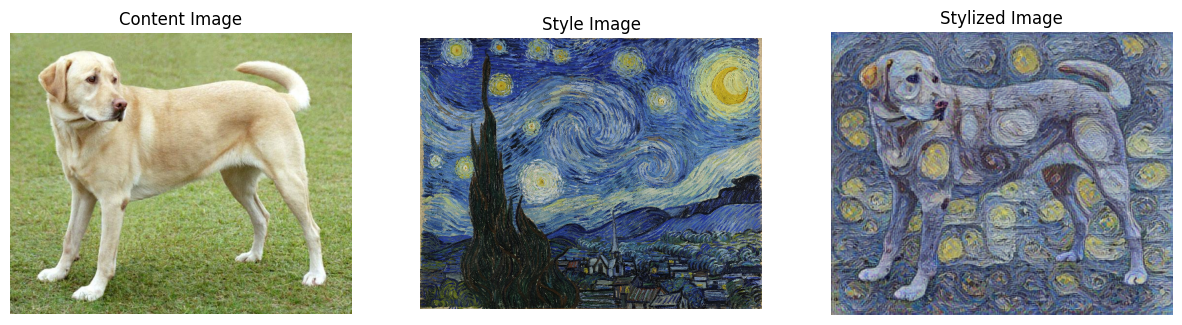

In [2]:
# prompt: Apply the artistic style of one image (e.g., a famous painting) to the content of another image using neural style transfer.
# This task involves using deep learning techniques to combine the style of one image and the content of another image to generate a new, stylized image. You can implement this using pretrained models like VGG19 and libraries such as TensorFlow or PyTorch.

!pip install -q tensorflow

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

# Load the hub model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Helper function to load and preprocess the image
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

# Helper function to display the image
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)
  plt.axis('off')

# Load content and style images
content_image_path = tf.keras.utils.get_file('content_image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_image_path = tf.keras.utils.get_file('style_image.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

content_image = load_img(content_image_path)
style_image = load_img(style_image_path)

# Stylize the image
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Display the results
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 3, 2)
imshow(style_image, 'Style Image')

plt.subplot(1, 3, 3)
imshow(stylized_image, 'Stylized Image')
plt.show()